Missing values in each MAPE column:
MAPE: 1 Step     0
MAPE: 2 Step     0
MAPE: 3 Step     0
MAPE: 4 Step     0
MAPE: 5 Step     0
MAPE: 6 Step     0
MAPE: 7 Step     0
MAPE: 8 Step     0
MAPE: 9 Step     0
MAPE: 10 Step    0
MAPE: 11 Step    0
MAPE: 12 Step    0
MAPE: 13 Step    0
MAPE: 14 Step    0
MAPE: 15 Step    0
MAPE: 16 Step    0
MAPE: 17 Step    0
MAPE: 18 Step    0
MAPE: 19 Step    0
MAPE: 20 Step    0
dtype: int64


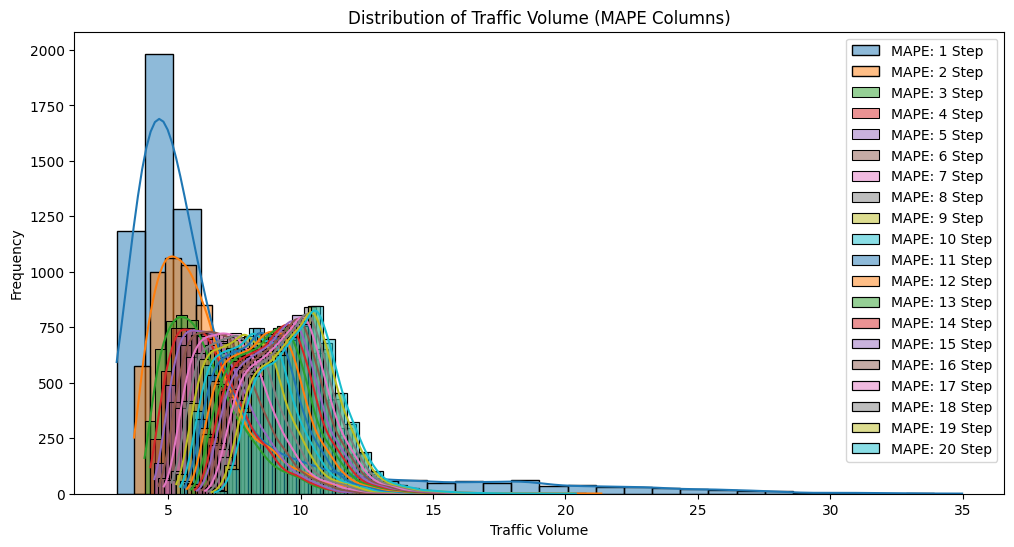

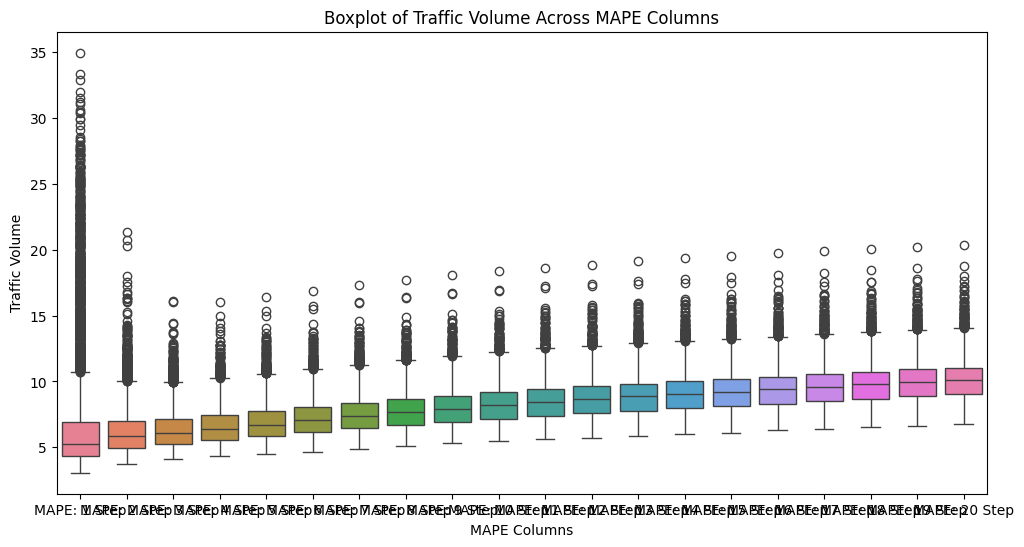

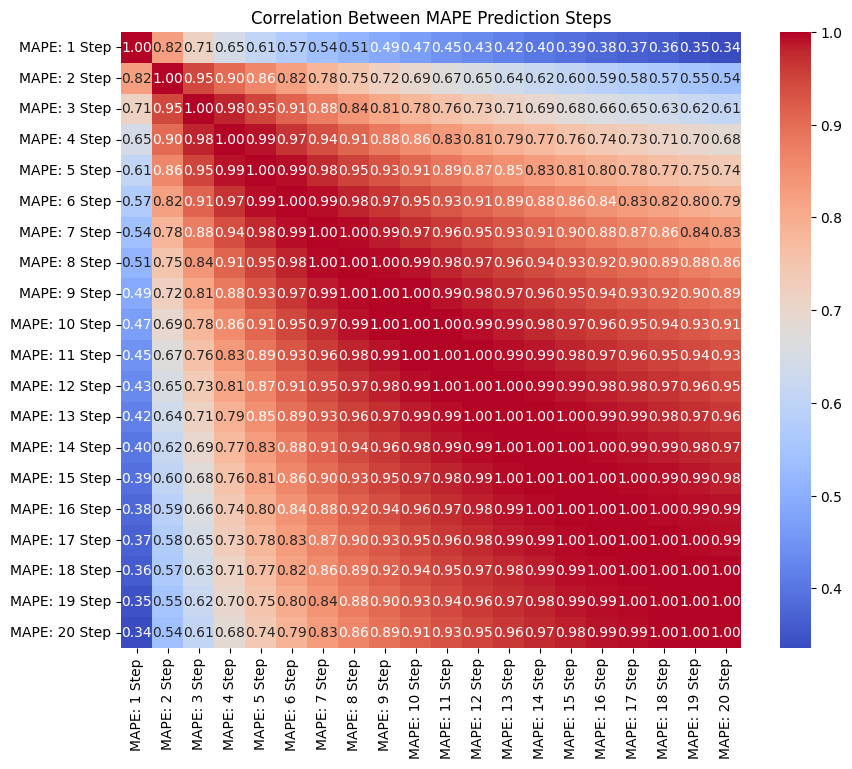

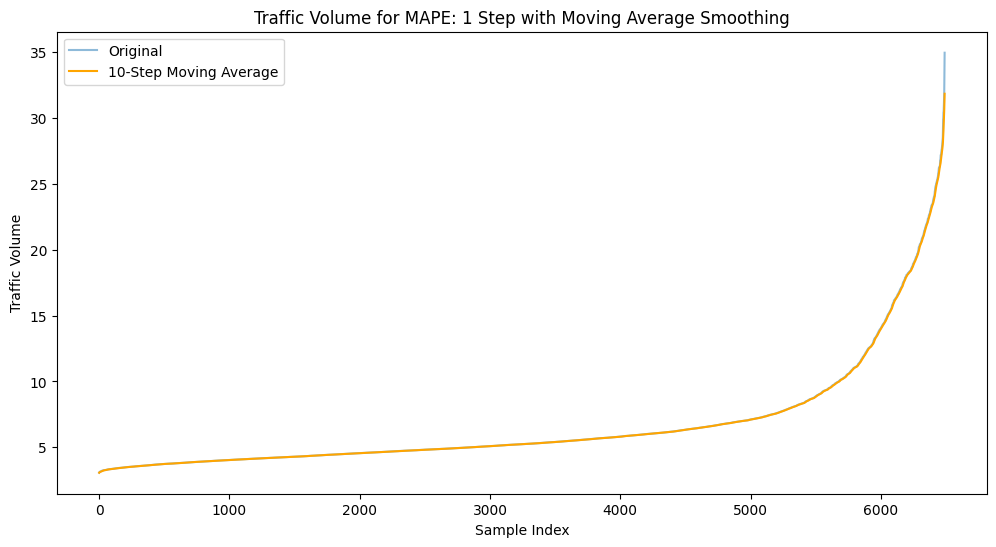

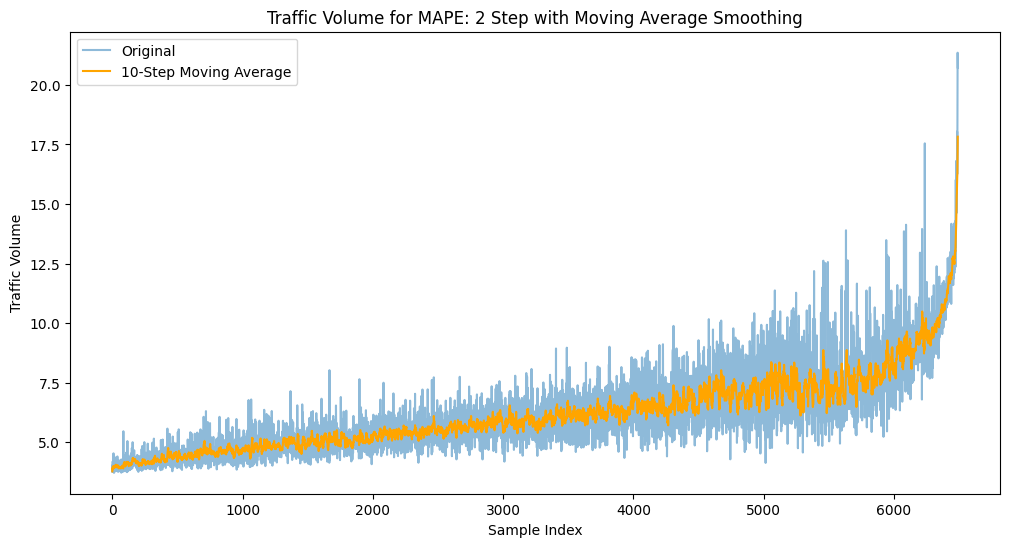

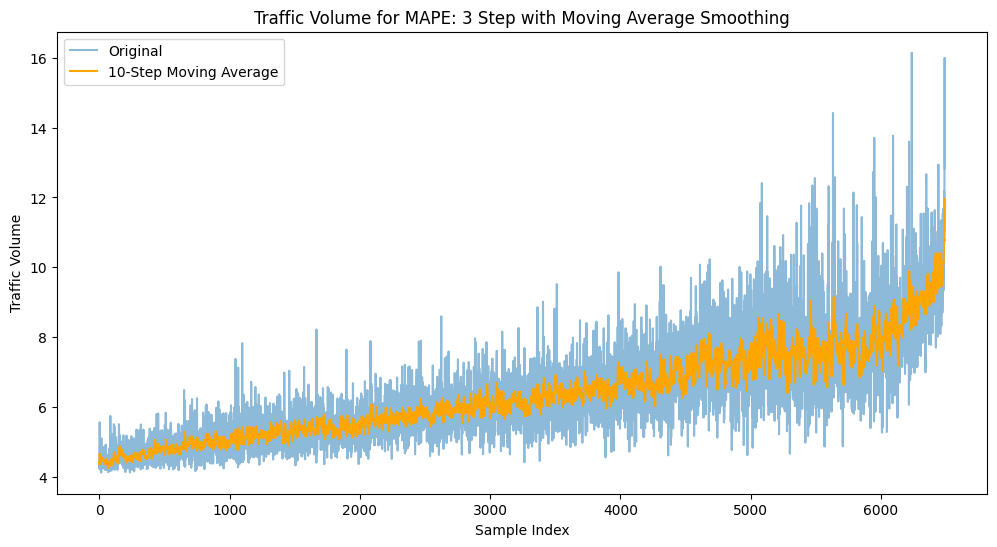

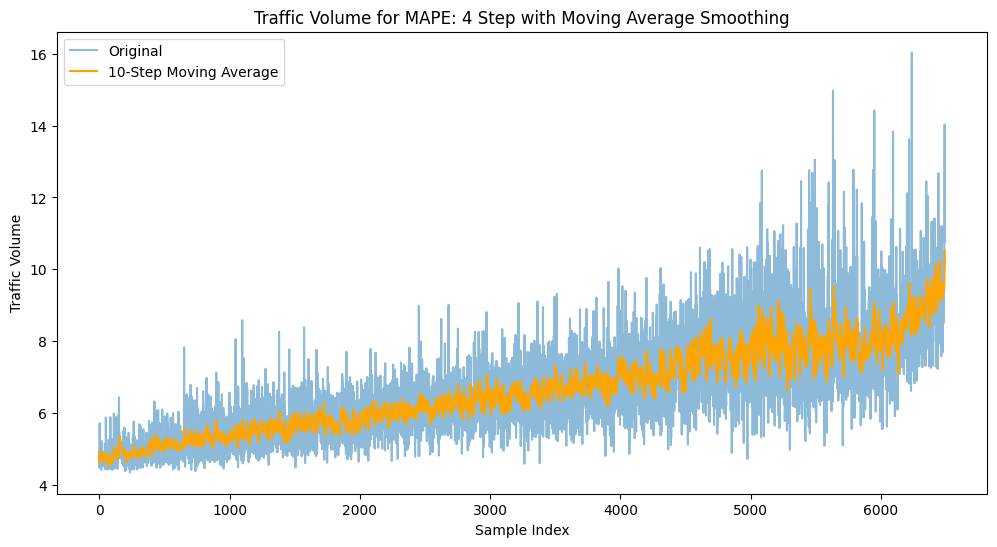

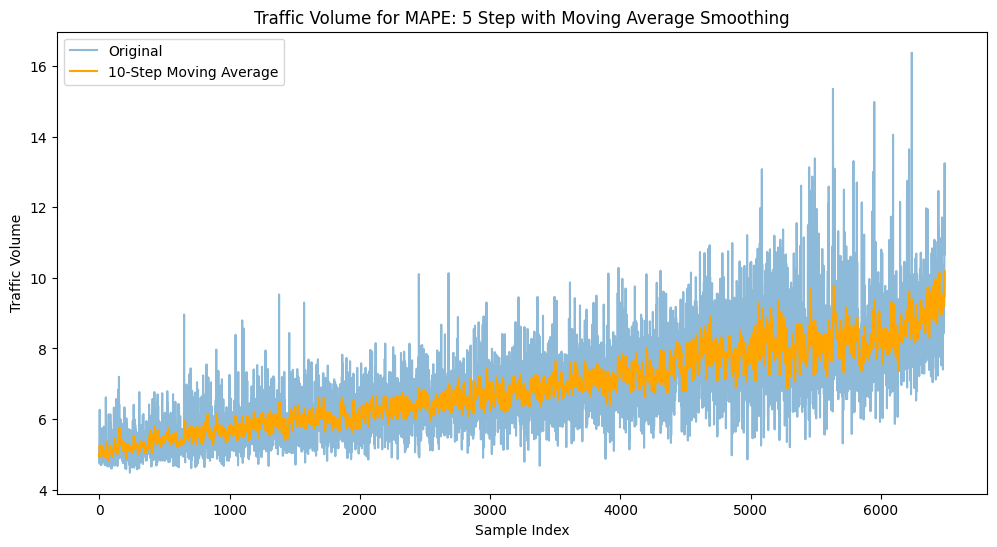

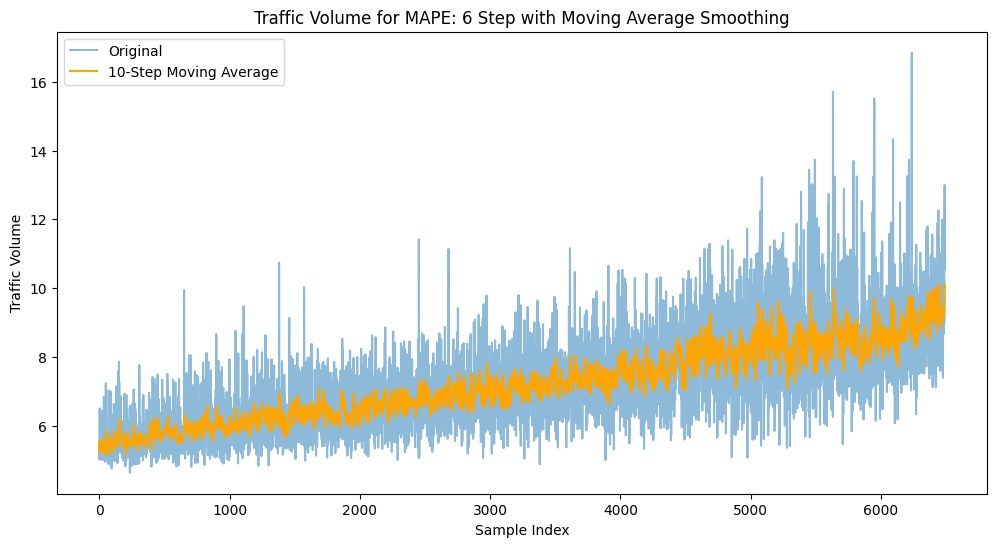

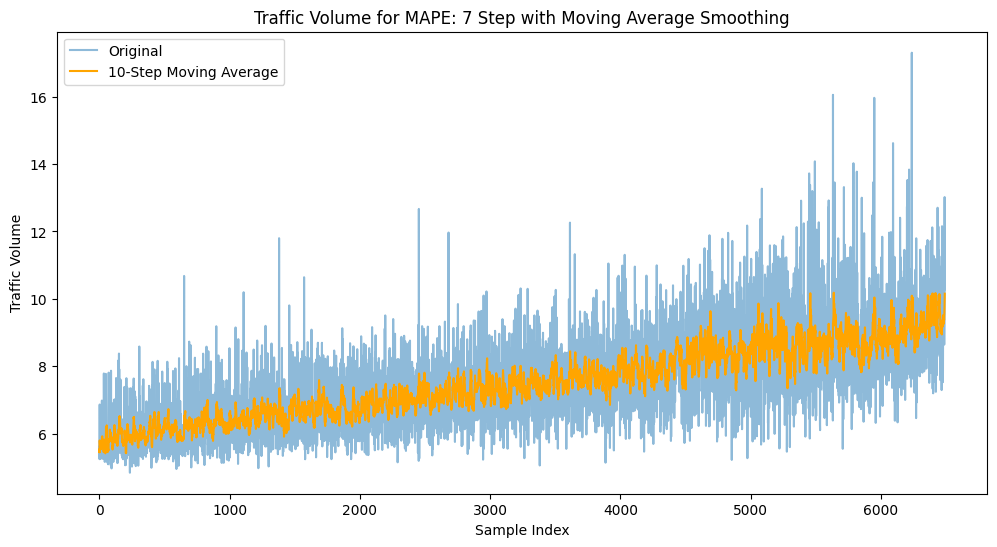

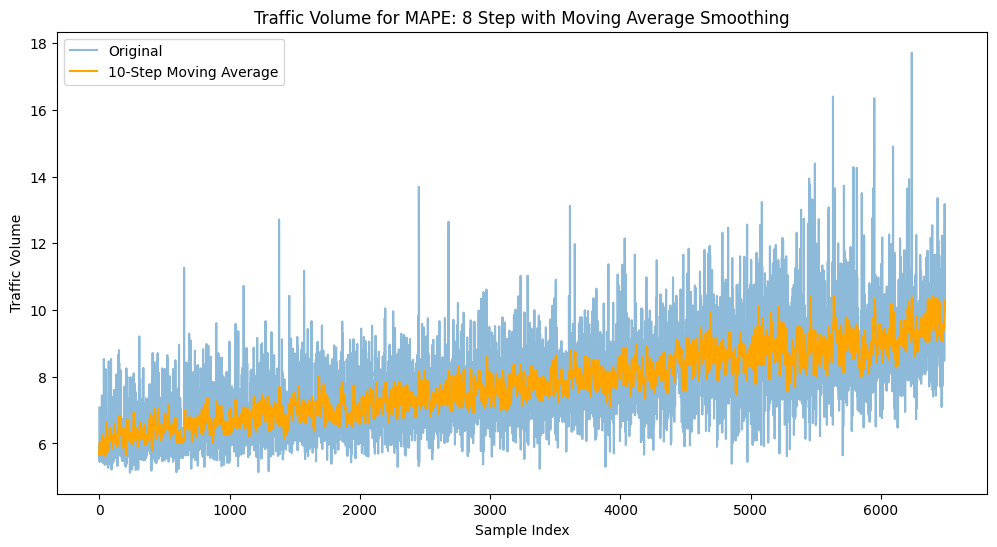

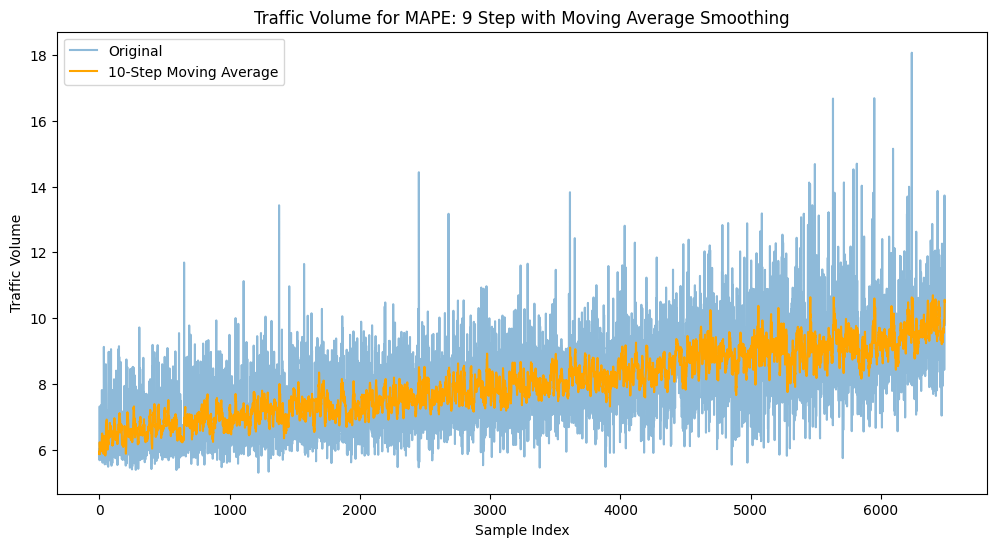

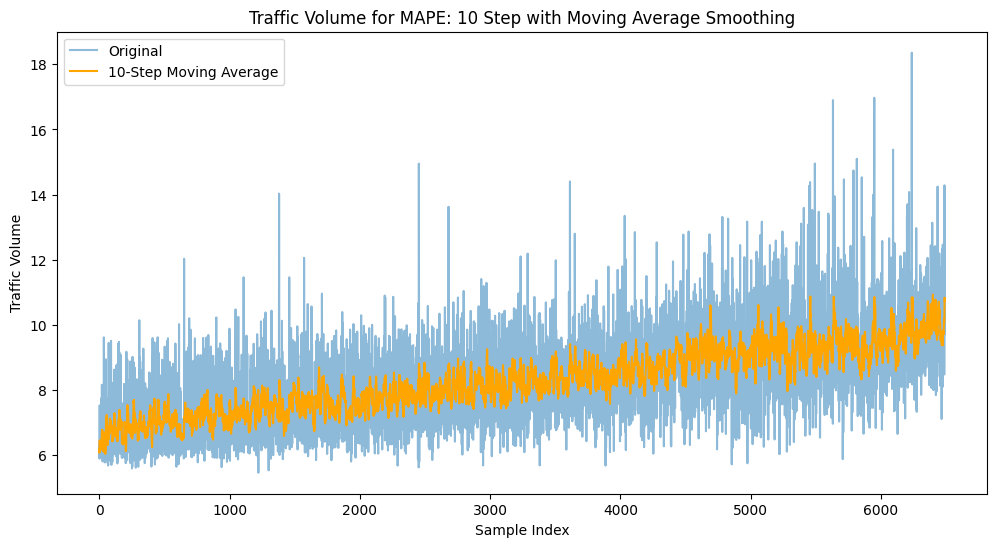

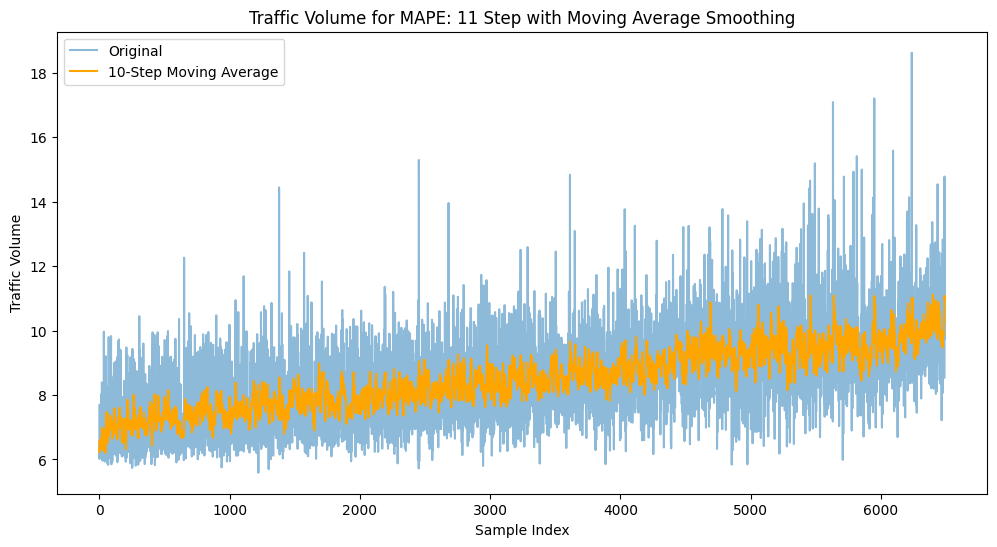

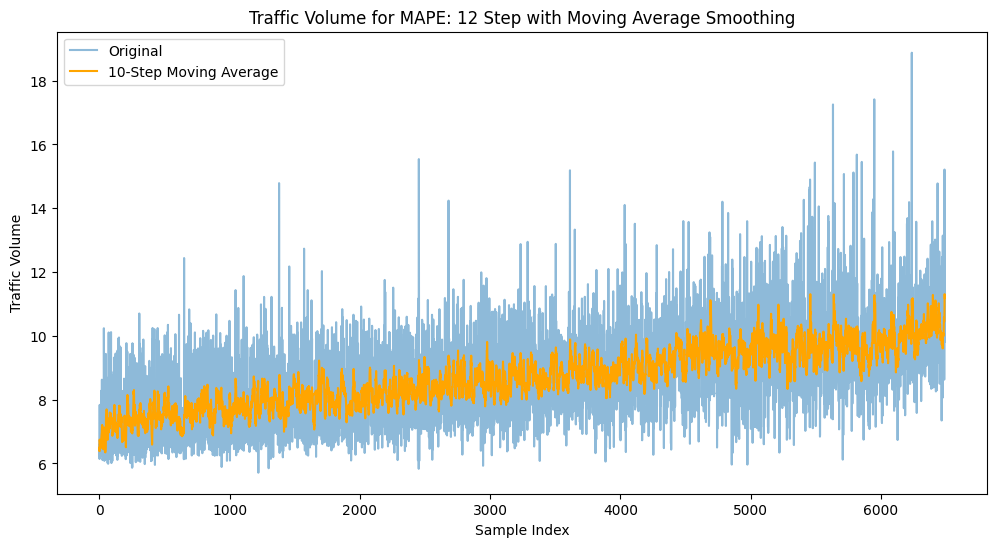

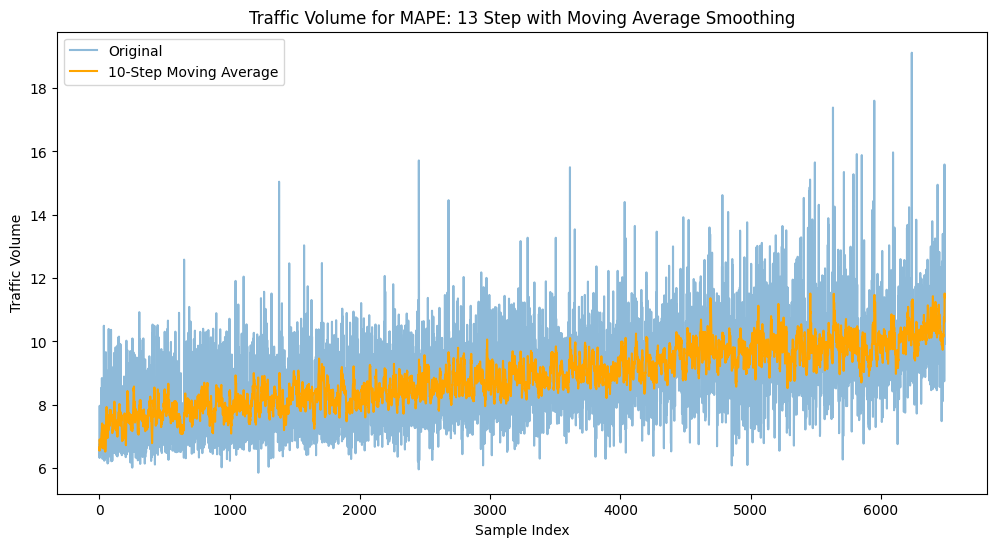

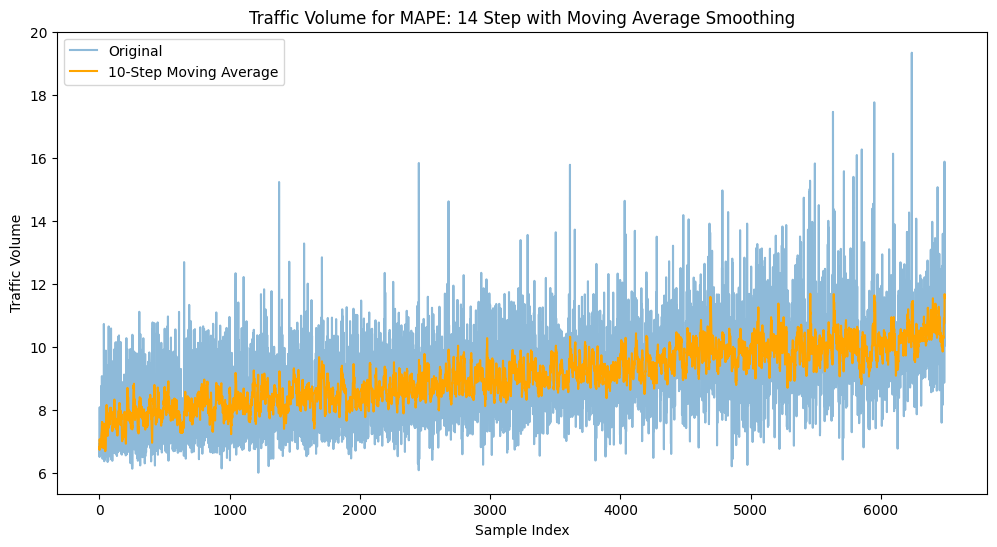

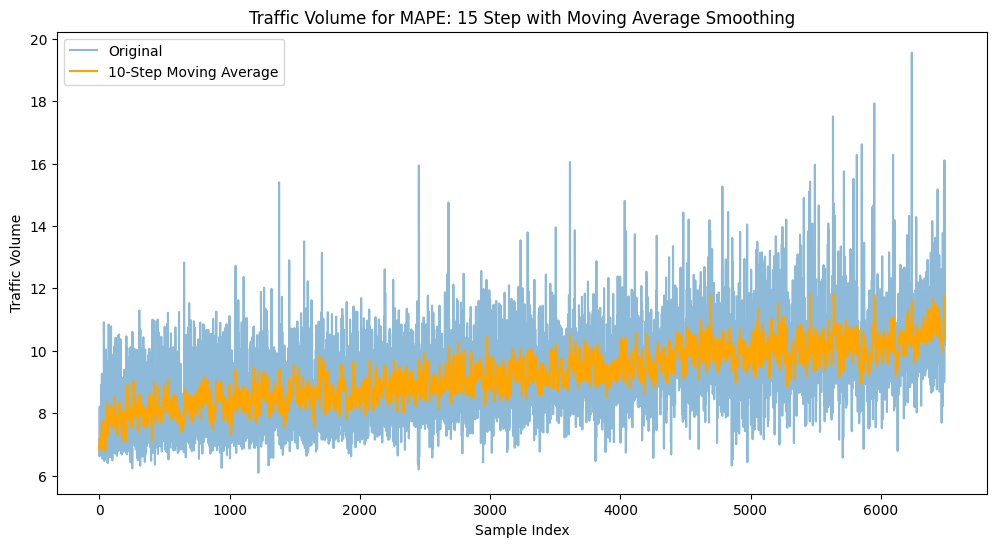

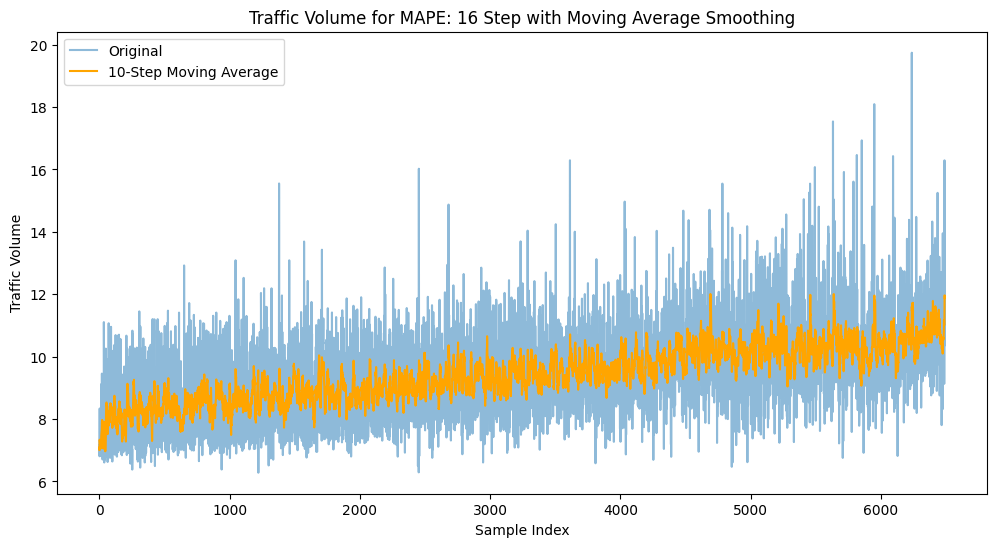

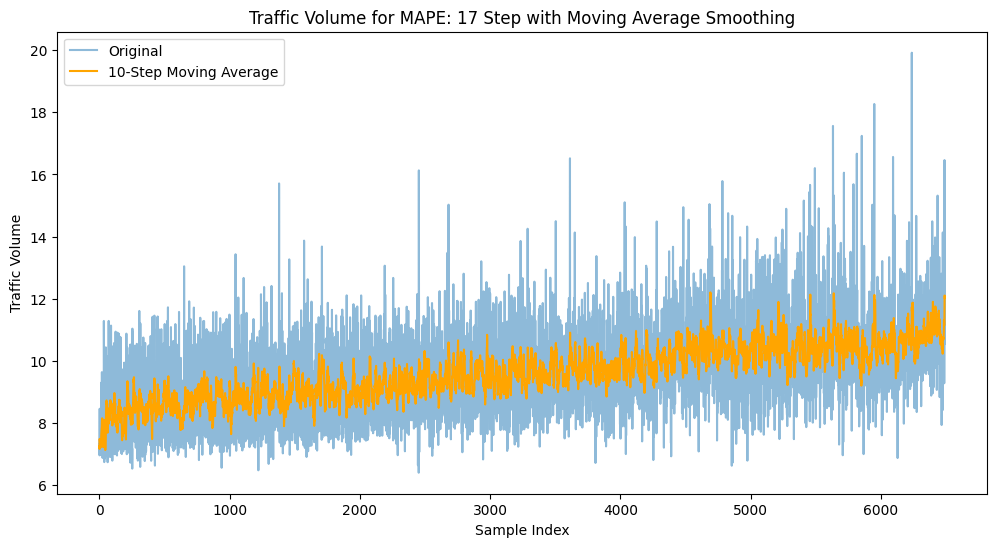

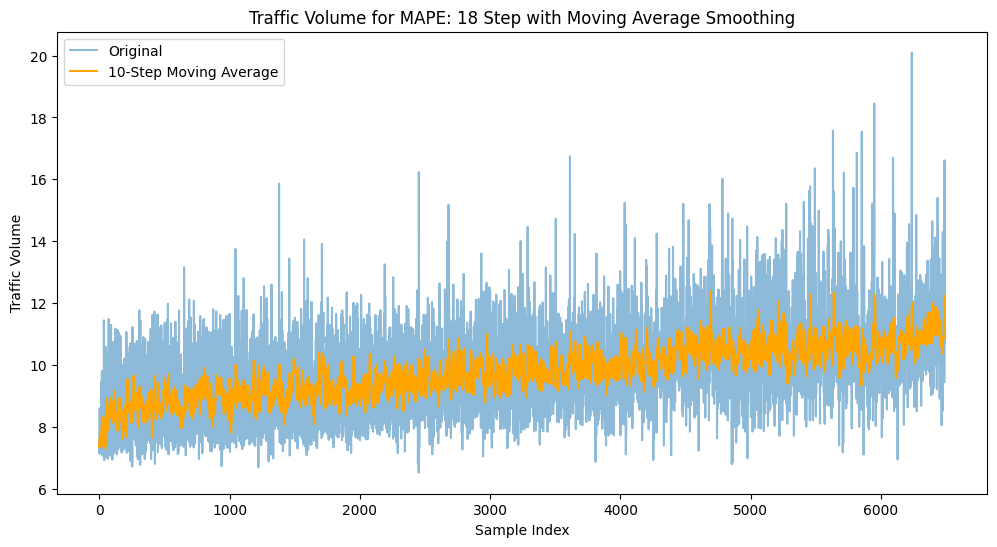

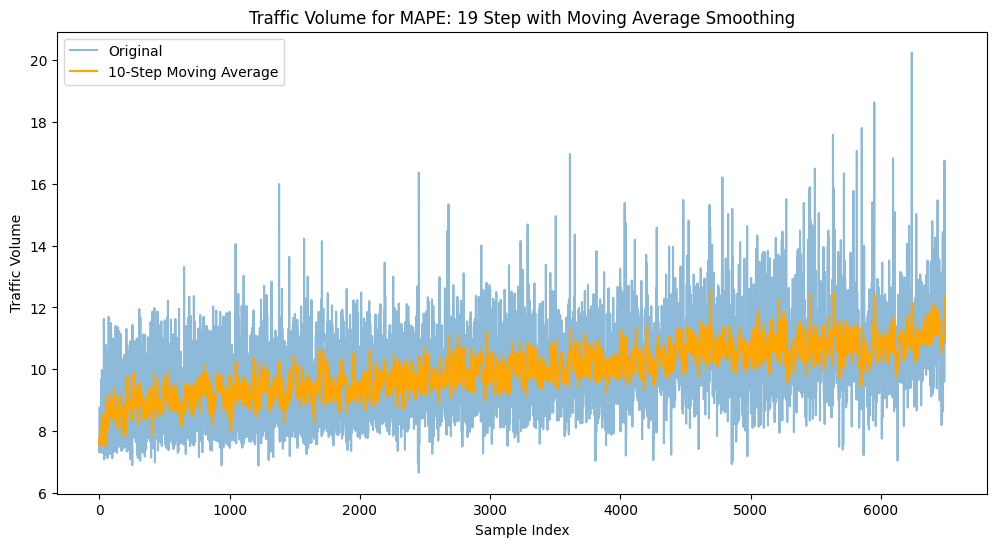

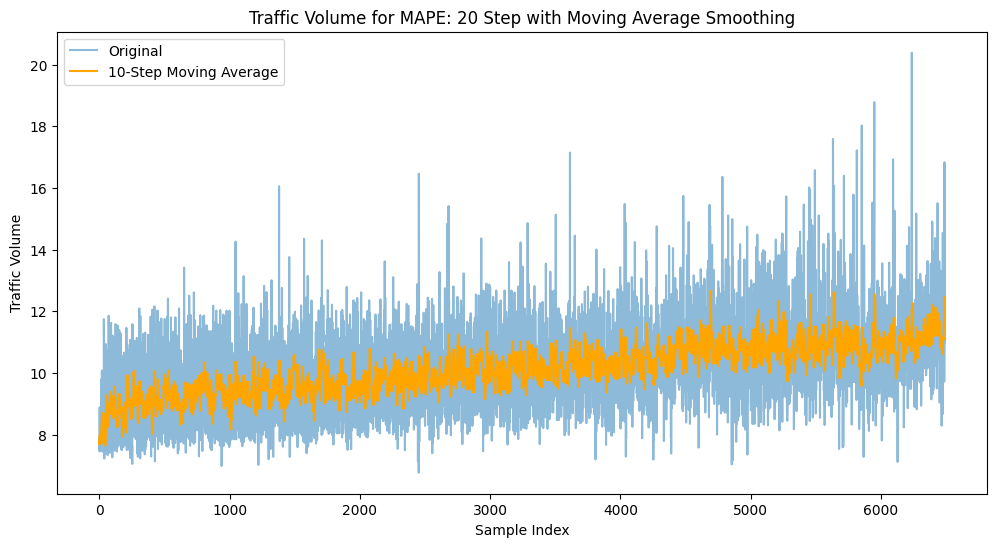

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/benchmark_final (2).csv')

# Identify columns that contain 'MAPE' for network traffic analysis
mape_columns = [col for col in data.columns if 'MAPE' in col]

# Check for any missing values in the MAPE columns
missing_values = data[mape_columns].isnull().sum()
print("Missing values in each MAPE column:")
print(missing_values)

# Plot distribution of traffic values across MAPE columns
plt.figure(figsize=(12, 6))
for col in mape_columns:
    sns.histplot(data[col], kde=True, label=col, bins=30)
plt.title("Distribution of Traffic Volume (MAPE Columns)")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot boxplots to identify potential outliers in each MAPE column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[mape_columns])
plt.title("Boxplot of Traffic Volume Across MAPE Columns")
plt.xlabel("MAPE Columns")
plt.ylabel("Traffic Volume")
plt.show()

# Calculate and display the correlation matrix between MAPE columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[mape_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between MAPE Prediction Steps")
plt.show()

# Moving Average Smoothing (over each MAPE column separately)
for col in mape_columns:
    data[f"{col}_Moving_Avg"] = data[col].rolling(window=10, min_periods=1).mean()

    # Plot original data vs. moving average
    plt.figure(figsize=(12, 6))
    plt.plot(data[col], label="Original", alpha=0.5)
    plt.plot(data[f"{col}_Moving_Avg"], label="10-Step Moving Average", color='orange')
    plt.title(f"Traffic Volume for {col} with Moving Average Smoothing")
    plt.xlabel("Sample Index")
    plt.ylabel("Traffic Volume")
    plt.legend()
    plt.show()
